In [65]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [72]:
# import the necessary packages
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras.layers import concatenate
class MiniInceptionNet:
    @staticmethod
    def build(width, height, depth, classes):
        
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        input_img = Input(shape=(width, height, depth))
        
        layer_0 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
        ####layer_0 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_0)
        ### 1st layer
        layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
        layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

        layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
        layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

        layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
        layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

        mid_1 = concatenate([layer_0,layer_1, layer_2, layer_3], axis = 3)
        
        layer_0 = Conv2D(10, (1,1), padding='same', activation='relu')(mid_1)
        ####layer_0 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_0)
        ### 1st layer
        layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(mid_1)
        layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

        layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(mid_1)
        layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

        layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(mid_1)
        layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

        mid_2 = concatenate([layer_0,layer_1, layer_2, layer_3], axis = 3)

        ##flat_1 = GlobalAveragePooling2D()(mid_2)
        flat_1 = Flatten()(mid_2)

        dense_1 = Dense(1024, activation='relu')(flat_1)
        dense_2 = Dense(512, activation='relu')(dense_1)
        dense_3 = Dense(64, activation='relu')(dense_2)
        output = Dense(classes, activation='softmax')(dense_1)

        model = Model([input_img], output)
    # return the constructed network architecture
        return model

In [73]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
## from pyimagesearch.minivggnet import MiniVGGNet
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 21
INIT_LR = 1e-2
BS = 32

print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

print(trainX.shape, testX.shape)

[INFO] loading Fashion MNIST...
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [74]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]
print("Done with initialization ...")

Done with initialization ...


In [75]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = MiniInceptionNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
# train the network
print("[INFO] training model...")
# load model
from keras.models import load_model
model_name = "model_"+str(NUM_EPOCHS)+".h5"
try :
    model = load_model(model_name)

except :
    print("No File Found")

[INFO] compiling model...
[INFO] training model...
No File Found


In [76]:
import pydot
# summarize model
model.summary()
# plot model architecture
#plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_77 (Conv2D)              (None, 28, 28, 10)   20          input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_79 (Conv2D)              (None, 28, 28, 10)   20          input_10[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 28, 28, 1)    0           input_10[0][0]                   
____________________________________________________________________________________________

In [77]:
created_new_model = False

if(model.name != model_name):
    created_new_model = True
    print("I should be skipping if I already have a model for this ... ")
    H = model.fit(trainX, trainY,validation_data=(testX, testY),batch_size=BS, epochs=NUM_EPOCHS)

I should be skipping if I already have a model for this ... 
Train on 60000 samples, validate on 10000 samples
Epoch 1/21
60000/60000 [==============================] - 3427s 57ms/step - loss: 0.4185 - accuracy: 0.8470 - val_loss: 0.3367 - val_accuracy: 0.8746
Epoch 2/21
18112/60000 [========>.....................] - ETA: 4:20 - loss: 0.2802 - accuracy: 0.8971

KeyboardInterrupt: 

In [25]:
if(created_new_model):
    # save model and architecture to single file
    model_name = "model_"+str(NUM_EPOCHS)+".h5"
    model.name = model_name
    model.save(model_name)
    print("Saved model to disk")
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(H.history) 

   # or save to csv: 
    hist_csv_file = 'history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
        
    print("Saved new model and History")
        
if(not created_new_model) :
    hist_df = pd.read_csv('history.csv')
    H.history = hist_df.to_dict()
    print("Loaded History")

Saved model to disk
Saved new model and History


In [37]:
y_prob = model.predict(testX) 
y_pred = y_prob.argmax(axis=-1)
submit = pd.read_csv('sample_submission.csv')
submit.label = y_pred
submit.head()
submit.to_csv("results_incpetion_net.csv",index=False)
print("Successfully created results")

Successfully created results


[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.86      0.81      0.84      1000
     trouser       0.99      0.97      0.98      1000
    pullover       0.85      0.78      0.81      1000
       dress       0.90      0.89      0.89      1000
        coat       0.79      0.84      0.81      1000
      sandal       0.97      0.96      0.97      1000
       shirt       0.69      0.74      0.71      1000
     sneaker       0.93      0.95      0.94      1000
         bag       0.97      0.98      0.97      1000
  ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



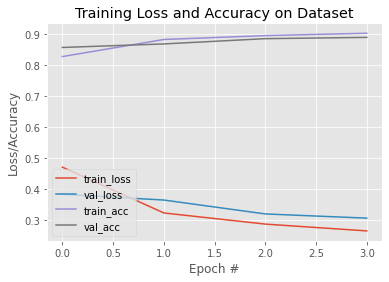

In [27]:
%matplotlib inline
# make predictions on the test set
preds = model.predict(testX)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")
plt.show()